 # **DATA PREPARATION**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
upload = files.upload()

Saving carsales.csv to carsales.csv


# **DATA FRAMEWORK**

In [3]:
carsales = pd.read_csv('/content/carsales.csv')

In [4]:
carsales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


# **Exploratory Data Analysis (EDA)**

In [5]:
carsales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [6]:
carsales.shape

(1000, 5)

In [7]:
carsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [8]:
df2 = carsales.value_counts()
df2

Make    Colour  Odometer (KM)  Doors  Price  
BMW     Black   11049.0        3.0    19500.0    1
Toyota  Black   98409.0        4.0    32863.0    1
        Blue    44815.0        4.0    8460.0     1
                48684.0        4.0    33817.0    1
                51155.0        4.0    15960.0    1
                                                ..
Honda   White   92883.0        4.0    14931.0    1
                95481.0        4.0    8687.0     1
                95579.0        4.0    11135.0    1
                100527.0       4.0    22616.0    1
Toyota  White   248815.0       4.0    9785.0     1
Name: count, Length: 773, dtype: int64

In [9]:
carsales.nunique()

Make               4
Colour             5
Odometer (KM)    948
Doors              3
Price            934
dtype: int64

In [10]:
carsales. duplicated().values.any()

True

In [11]:
carsales. duplicated().sum()

1

In [12]:
missing_values = carsales.isnull().sum()
print(missing_values)

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64


In [13]:
NAN_rows = carsales[carsales.isnull().any(axis=1)]

In [14]:
NAN_rows

,Make,Colour,Odometer (KM),Doors,Price
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
13,NaN,White,134181.0,4.0,11121.0
20,Toyota,NaN,124844.0,4.0,24130.0
21,Honda,NaN,30615.0,4.0,29653.0
...,...,...,...,...,...
974,NaN,White,155383.0,4.0,14345.0
975,Honda,NaN,22409.0,4.0,10429.0
983,Toyota,Red,NaN,4.0,14671.0
985,NaN,Blue,216250.0,4.0,9691.0


# **Data Cleaning**

1. Handling Missing Data Options
- Drop rows with missing values
- Fill missing values with a specific value (e.g., mean, median)
- Impute missing values based on other data

In [15]:
carsales = carsales.drop_duplicates()
carsales.shape

(999, 5)

In [16]:
carsales.isnull().sum()

Make             49
Colour           50
Odometer (KM)    49
Doors            50
Price            49
dtype: int64

Here, since our data had null values on all columns. We can't do correlation analysis that can train data imputation. We need to consider how to handle this and navigate the advantages and disadvantages if we are to just drop all null or we execute data imputation below.   

HERE: We choose the dropna() method.

In [17]:
carsales.dropna(inplace=True)

<ipython-input-17-e51ef6a0c8ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carsales.dropna(inplace=True)


In [18]:
carsales.isnull().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

# **Data Analysis and Visualization**

In [19]:
carsales.describe()

,Odometer (KM),Doors,Price
count,773.000000,773.000000,773.000000
mean,131229.655886,4.010349,16189.523933
std,69482.980143,0.384137,8540.820948
min,10148.000000,3.000000,2796.000000
25%,71283.000000,4.000000,9785.000000
50%,130494.000000,4.000000,14588.000000
75%,193006.000000,4.000000,20893.000000
max,249860.000000,5.000000,52458.000000


**Sample Analysis**

In [20]:
carsales[carsales['Price']>10000]

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
992,Honda,Green,54721.0,4.0,27419.0
994,BMW,Blue,163322.0,3.0,31666.0
995,Toyota,Black,35820.0,4.0,32042.0
997,Nissan,Blue,66604.0,4.0,31570.0


In [21]:
carsales[carsales['Odometer (KM)']>80000]

,Make,Colour,Odometer (KM),Doors,Price
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
6,Toyota,Blue,163453.0,4.0,8473.0
...,...,...,...,...,...
991,Honda,Blue,235985.0,4.0,9184.0
993,Nissan,Black,162523.0,4.0,4696.0
994,BMW,Blue,163322.0,3.0,31666.0
998,Honda,White,215883.0,4.0,4001.0


In [22]:
# Assuming your data is already in a DataFrame named 'carsales'
# Group the data by the 'Make' column and calculate the mean price for each make
price_by_make = carsales.groupby('Make')['Price'].mean().reset_index()

# Display the average price for each make
print("Average Price:")
print(price_by_make)


Average Price:
     Make         Price
0     BMW  26467.075949
1   Honda  14585.638298
2  Nissan  13865.921569
3  Toyota  15929.712418


In [23]:
carsales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
994,BMW,Blue,163322.0,3.0,31666.0
995,Toyota,Black,35820.0,4.0,32042.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


**Data Visualization**

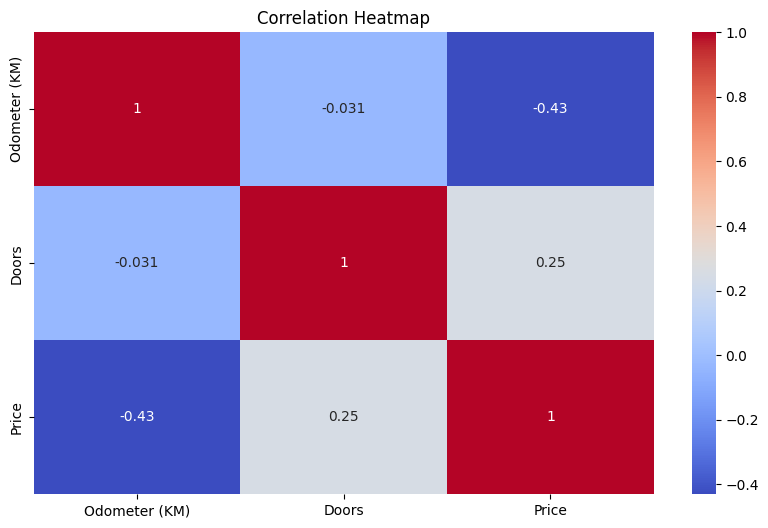

In [24]:
# Exclude non-numeric columns from the correlation computation
numeric_columns = carsales.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = carsales[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Which 'Make' brand had the highest cost?**

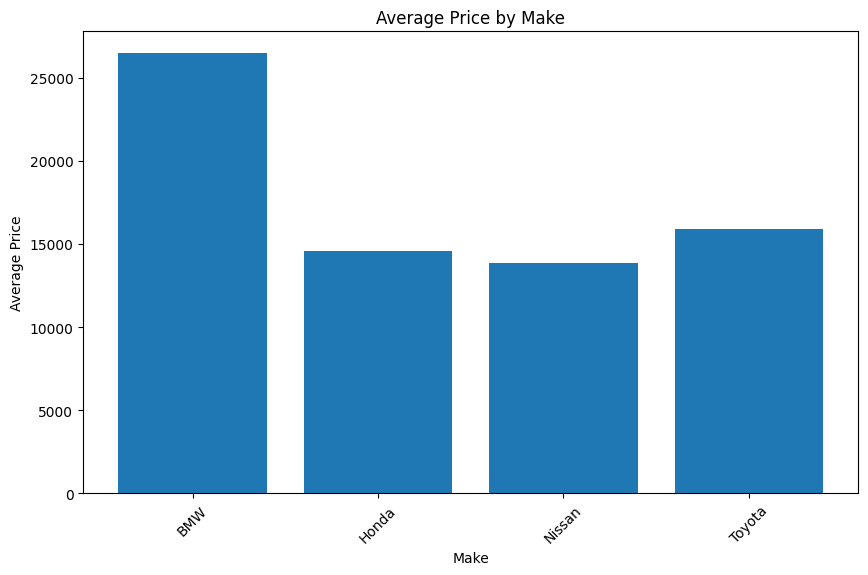

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(price_by_make['Make'], price_by_make['Price'])
plt.xlabel('Make')
plt.ylabel('Average Price')
plt.title('Average Price by Make')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Which 'Make' brand had the longest reach?**

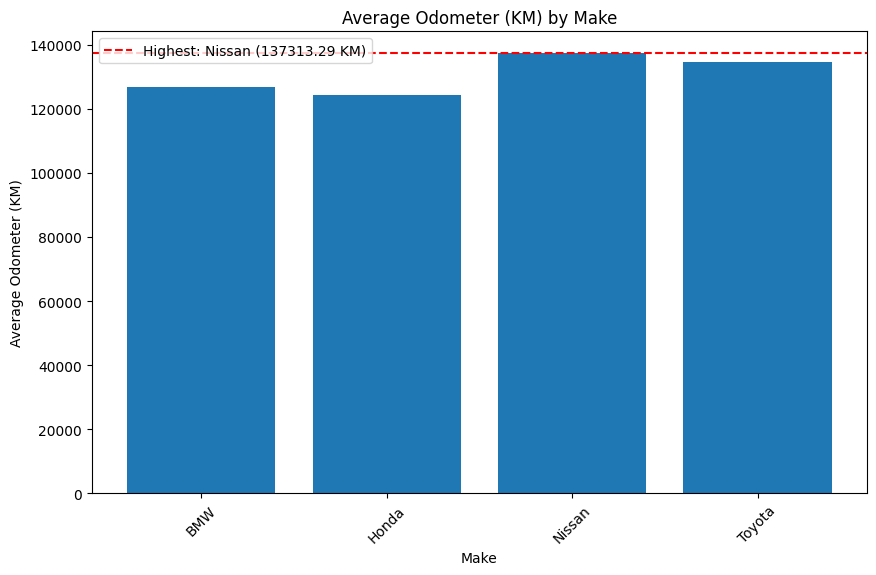

In [26]:
# Group the data by 'Make' and calculate the mean of 'Odometer (KM)' for each group
odometer_by_make = carsales.groupby('Make')['Odometer (KM)'].mean().reset_index()

# Plot a bar chart showing the average odometer reading for each make
plt.figure(figsize=(10, 6))
plt.bar(odometer_by_make['Make'], odometer_by_make['Odometer (KM)'])
plt.xlabel('Make')
plt.ylabel('Average Odometer (KM)')
plt.title('Average Odometer (KM) by Make')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Highlight the make with the highest average odometer reading
max_odometer_make = odometer_by_make.loc[odometer_by_make['Odometer (KM)'].idxmax(), 'Make']
max_odometer_value = odometer_by_make['Odometer (KM)'].max()
plt.axhline(y=max_odometer_value, color='r', linestyle='--', label=f'Highest: {max_odometer_make} ({max_odometer_value:.2f} KM)')

plt.legend()
plt.show()

**Is 'Price' affected when we increase the number of 'Doors'?**

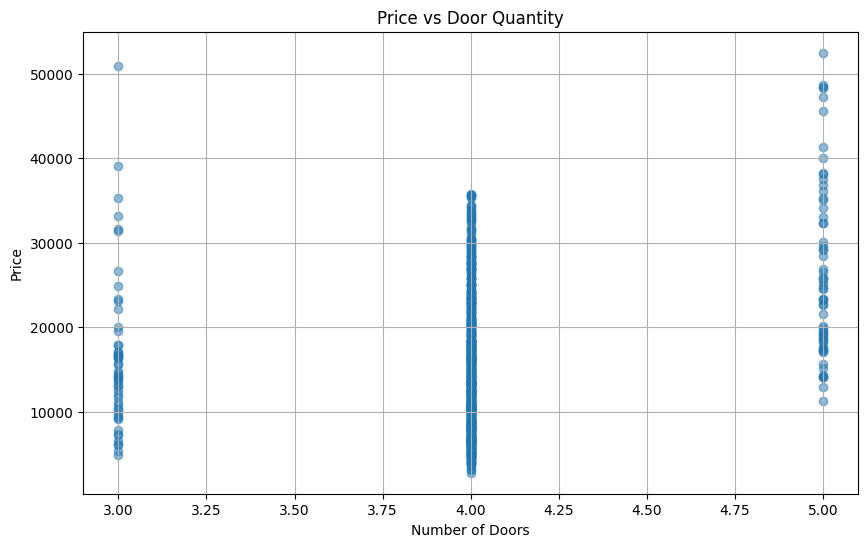

In [27]:
import matplotlib.pyplot as plt

# Plot a scatter plot showing the relationship between price and door quantity
plt.figure(figsize=(10, 6))
plt.scatter(carsales['Doors'], carsales['Price'], alpha=0.5)
plt.xlabel('Number of Doors')
plt.ylabel('Price')
plt.title('Price vs Door Quantity')
plt.grid(True)  # Add grid for better visualization
plt.show()

**Does 'Color' affect the 'Price'?**

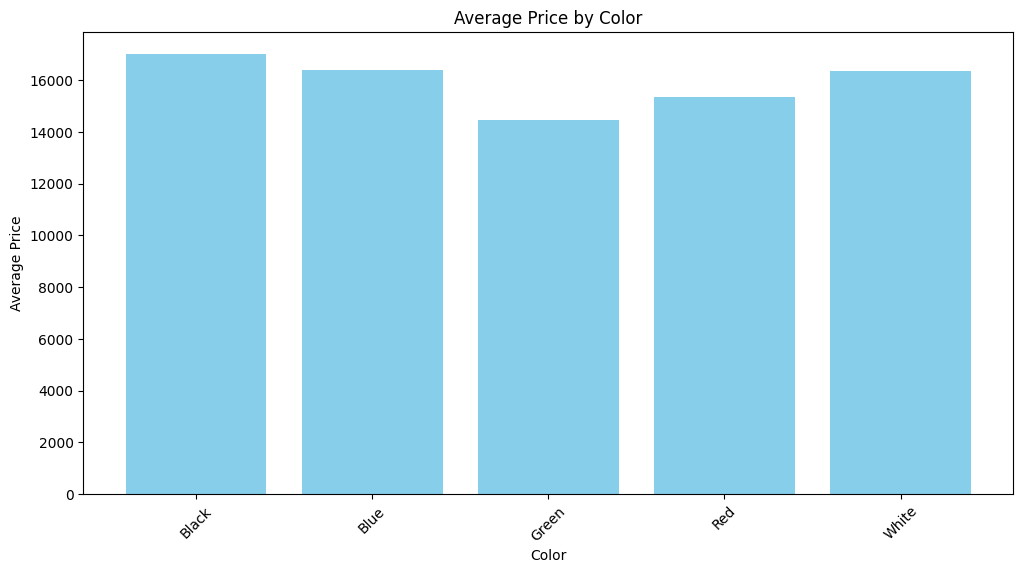

In [28]:
# Group the data by 'Colour' and calculate the mean of 'Price' for each color
average_price_by_color = carsales.groupby('Colour')['Price'].mean().reset_index()

# Plot a bar plot showing the average price for each color
plt.figure(figsize=(12, 6))
plt.bar(average_price_by_color['Colour'], average_price_by_color['Price'], color='skyblue')
plt.xlabel('Color')
plt.ylabel('Average Price')
plt.title('Average Price by Color')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [29]:
make_by_odometer = carsales.groupby('Make')['Odometer (KM)'].mean().reset_index()
print("Car Brand:")
print(make_by_odometer)


Car Brand:
     Make  Odometer (KM)
0     BMW  126964.075949
1   Honda  124331.897872
2  Nissan  137313.287582
3  Toyota  134586.382353


In [30]:
carsales['Make'].unique()

array(['Honda', 'BMW', 'Toyota', 'Nissan'], dtype=object)

In [31]:
toyota_data = carsales[carsales['Make'].str.lower() == 'toyota']

# Display filtered data
print(toyota_data)


       Make Colour  Odometer (KM)  Doors    Price
3    Toyota  White       154365.0    4.0  13434.0
6    Toyota   Blue       163453.0    4.0   8473.0
15   Toyota   Blue       205592.0    4.0  16290.0
16   Toyota    Red        96742.0    4.0  34465.0
22   Toyota  White       148744.0    4.0  22489.0
..      ...    ...            ...    ...      ...
981  Toyota  White       129454.0    4.0   6446.0
989  Toyota    Red        41735.0    4.0  13928.0
990  Toyota  White       173408.0    4.0   8082.0
995  Toyota  Black        35820.0    4.0  32042.0
999  Toyota   Blue       248360.0    4.0  12732.0

[306 rows x 5 columns]


In [32]:
display(toyota_data)

,Make,Colour,Odometer (KM),Doors,Price
3,Toyota,White,154365.0,4.0,13434.0
6,Toyota,Blue,163453.0,4.0,8473.0
15,Toyota,Blue,205592.0,4.0,16290.0
16,Toyota,Red,96742.0,4.0,34465.0
22,Toyota,White,148744.0,4.0,22489.0
...,...,...,...,...,...
981,Toyota,White,129454.0,4.0,6446.0
989,Toyota,Red,41735.0,4.0,13928.0
990,Toyota,White,173408.0,4.0,8082.0
995,Toyota,Black,35820.0,4.0,32042.0


In [33]:
toyota_data.value_counts()

Make    Colour  Odometer (KM)  Doors  Price  
Toyota  Black   17975.0        4.0    17940.0    1
        White   53765.0        4.0    18595.0    1
                66150.0        4.0    25111.0    1
                63832.0        4.0    6698.0     1
                62712.0        4.0    24342.0    1
                                                ..
        Blue    207048.0       4.0    10663.0    1
                205592.0       4.0    16290.0    1
                200597.0       4.0    13147.0    1
                198983.0       4.0    18440.0    1
        White   248815.0       4.0    9785.0     1
Name: count, Length: 306, dtype: int64

In [34]:
carsales.to_excel("clean_carsales.xlsx", engine = 'openpyxl')